# Predict Automobile Accident Risk in Virginia
*Saarthak Gupta, Agi Luong, Joshua Seiden*

*Abstract*: In this paper, we model a classification problem on car crash data from the Virginia Department of Transportation (VDOT), which contains over 1 million crash records from 2015 to 2023. With the rising number of tragic losses from car accidents, analysis of this data can help save lives. We predict the severity level of accidents based on environmental, social, and geographic factors and discover major characteristics that contribute to lethal crashes. For this purpose, we explore machine learning algorithms like random forests, logistic regression, and Artificial Neural Networks (ANNs). We describe data encoding and cleaning methods for this mostly categorical dataset and employ oversampling techniques to handle highly imbalanced classes in the data. The goal is to provide actionable insight for drivers and the Virginia Department of Transportation to increase road safety. State-of-the-art methods for time series forecasting are used to identify trends in the number of accidents per day at the state and county levels. Using a Recurrent Neural Network-based approach, the trends in the daily crashes are predicted for up to a year into the future. Sequence generation methods for this approach are also described.

## Step 1: Load the data set

In [ ]:
# Before you run this cell for the first time, you must do the following:
# 1. Download the data set from: https://drive.google.com/file/d/1zV1LdMx-3rqzsZNpRg5X3gtSMcV_VUZy/view?usp=sharing
# 2. Store the data set (Crash_Data.csv) in the Root Folder of your Google Drive
# 3. Once the data is uploaded, run this cell. It will prompt you to allow access to your Google Drive
# 4. Once you click through all the menus, the data should be loaded into the 'data' dataframe after this cell is done
# 5. In the future, this cell will always be able to load in the data without needing to upload a new file

from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = pd.read_csv('gdrive/My Drive/Crash_Data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
data.head(10)

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,B_PEOPLE,C_PEOPLE,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,VEH_COUNT,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,ROADWAY_SURFACE_COND,RELATION_TO_ROADWAY,ROADWAY_ALIGNMENT,ROADWAY_SURFACE_TYPE,ROADWAY_DEFECT,ROADWAY_DESCRIPTION,INTERSECTION_TYPE,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,WORK_ZONE_RELATED,WORK_ZONE_LOCATION,WORK_ZONE_TYPE,SCHOOL_ZONE,FIRST_HARMFUL_EVENT,FIRST_HARMFUL_EVENT_LOC,ALCOHOL_NOTALCOHOL,ANIMAL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_NOTSPEED,SPEED_DIFF_MAX,RD_TYPE,INTERSECTION_ANALYSIS,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,JURIS_CODE,PHYSICAL_JURIS,FUN,FAC,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET
0,-78.870556,38.645544,1,152915206,2015,2015/10/16 03:59:59+00,1700,A,0,2,1,0,3,0,0,2,3. Head On,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,"13. Driveway, Alley-Access - Related",3. Grade - Straight,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,6. Traffic Lanes Marked,2. Yes - Working and Obscured,2. No,NaN,NaN,3. No,20. Motor Vehicle In Transport,1. On Roadway,No,No,Belted,No,Yes,No,No,No,No,No,No,No,Yes,3.0,NOT_RD,Not Intersection,No,No,Yes,No,8. Staunton,82,082. Rockingham County,"4-Minor Arterial (H,3)",3-Two-Way Undivided,Rural,VDOT Primary,2,1. State Hwy Agency,Central Shenandoah,NaN,R-VA SR00259SB,9.63,586049.0,834.0
1,-77.134973,38.943531,2,153060033,2015,2015/10/10 03:59:59+00,2350,O,0,0,0,0,0,0,0,1,9. Fixed Object - Off Road,1. No Adverse Condition (Clear/Cloudy),5. Darkness - Road Not Lighted,1. Dry,1. Main-Line Roadway,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,1. No Traffic Control,6. No Traffic Control Device Present,2. No,NaN,NaN,3. No,28. Ran Off Road,4. Roadside,Yes,No,Belted,No,Yes,Yes,No,Yes,No,No,No,No,Yes,10.0,RD_RIGHT,Not Intersection,No,Yes,Yes,Yes,9. Northern Virginia,29,029. Fairfax County,"7-Local (J,6)",3-Two-Way Undivided,Urban,NonVDOT secondary,7,4. Federal Roads,Northern Virginia,NOVA,R-VA OT90072NB,0.41,NaN,NaN
2,-79.499399,36.660702,3,153035144,2015,2015/10/29 03:59:59+00,1124,B,0,0,1,0,1,0,0,1,9. Fixed Object - Off Road,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,8. Non-Intersection,3. Grade - Straight,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"1. Two-Way, Not Divided",1. Not at Intersection,6. Traffic Lanes Marked,1. Yes - Working,2. No,NaN,NaN,3. No,28. Ran Off Road,1. On Roadway,No,No,Belted,No,No,No,No,No,No,No,No,No,No,NaN,NOT_RD,VDOT Intersection,Yes,No,Yes,No,3. Lynchburg,71,071. Pittsylvania County,"5-Major Collector (I,4)",3-Two-Way Undivided,Rural,VDOT Secondary,6,1. State Hwy Agency,West Piedmont,NaN,R-VA071SC00750SB,5.90,518624.0,137.0
3,-77.336244,38.545770,4,150975078,2015,2015/04/06 03:59:59+00,900,O,0,0,0,0,0,0,0,2,1. Rear End,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,9. Within Intersection,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"2. Two-Way, Divided, Unprotected Median",4. Four Approaches,3. Traffic Signal,1. Yes - Working,2. No,NaN,NaN,3. No,20. Motor Vehicle In Transport,1. On Roadway,No,No,Belted,No,No,No,No,No,No,No,No,No,No,NaN,NOT_RD,Not Intersection,No,No,Yes,No,9. Northern Virginia,76,076. Prince William County,"5-Major Collector (I,4)",3-Two-Way Undivided,Urban,VDOT Secondary,7,1. State Hwy Agency,Northern Virginia,NOVA,R-VA076SC00619EB,25.74,NaN,NaN
4,-79.337225,36.581073,5,152335159,2015,2015/08/21 03:59:59+00,751,O,0,0,0,0,0,0,0,2,2. Angle,1. No Adverse Condition (Clear/Cloudy),2. Daylight,1. Dry,1. Main-Line Roadway,1. Straight - Level,"2. Blacktop, Asphalt, Bituminous",1. No Defects,"2. Two-Way, Divided, Unprotected Median",1. Not at Intersection

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048311 entries, 0 to 1048310
Data columns (total 69 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   X                         1048297 non-null  float64
 1   Y                         1048297 non-null  float64
 2   OBJECTID                  1048311 non-null  int64  
 3   DOCUMENT_NBR              1048311 non-null  int64  
 4   CRASH_YEAR                1048311 non-null  int64  
 5   CRASH_DT                  1048311 non-null  object 
 6   CRASH_MILITARY_TM         1048311 non-null  int64  
 7   CRASH_SEVERITY            1048311 non-null  object 
 8   K_PEOPLE                  1048311 non-null  int64  
 9   A_PEOPLE                  1048311 non-null  int64  
 10  B_PEOPLE                  1048311 non-null  int64  
 11  C_PEOPLE                  1048311 non-null  int64  
 12  PERSONS_INJURED           1048311 non-null  int64  
 13  PEDESTRIANS_KILLED        1

In [ ]:
# The number of total unique Virginia roads represented in this data

# Details of how route names work: https://www.arcgis.com/apps/Cascade/index.html?appid=dfd5ea4d540f485f9ab2a8fe7697c256

len(data['RTE_NM'].unique())

58656

## Step 2: EDA

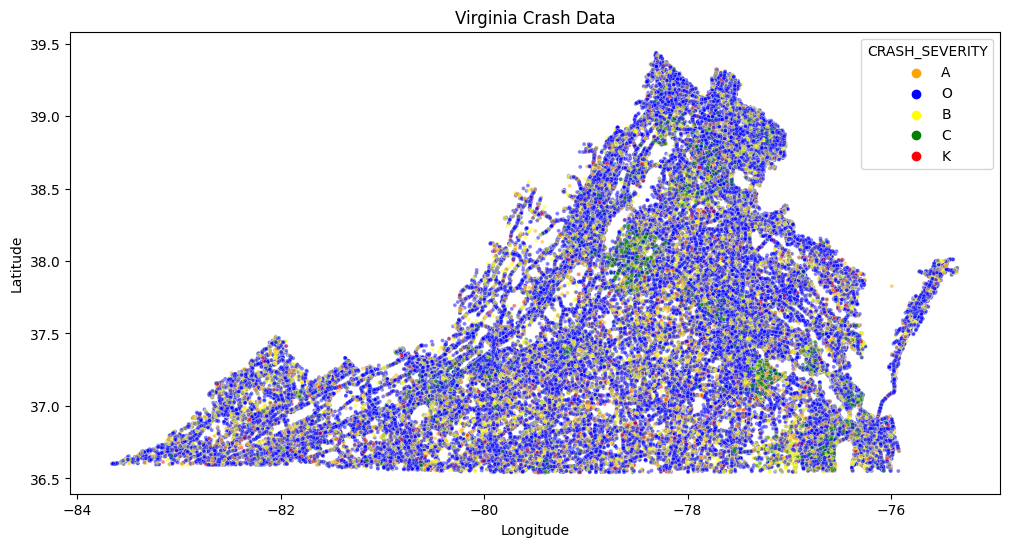

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

severity_colors = {'K': 'red', 'A': 'orange', 'B': 'yellow', 'C': 'green', 'O': 'blue'}

plt.figure(figsize=(12, 6))
sns.scatterplot(x='X', y='Y', hue='CRASH_SEVERITY', data=data, alpha=0.5, palette=severity_colors, s=8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Virginia Crash Data')
plt.show()

# K - Fatality
# A - Suspected Serious Injury
# B - Suspected Minor Injury
# C - Possible Injury
# O - Property Damage Only (No Apparent Injury)

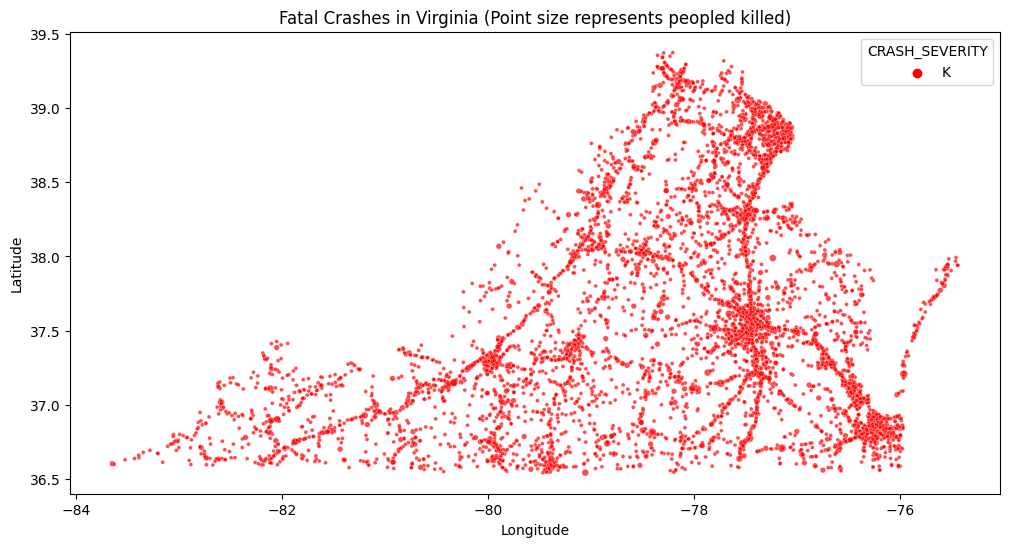

In [ ]:
fatal = data[data['CRASH_SEVERITY'] == 'K']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='X', y='Y', hue='CRASH_SEVERITY', data=fatal, alpha=0.7, palette=severity_colors, s=fatal['K_PEOPLE']*8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Fatal Crashes in Virginia (Point size represents peopled killed)')
plt.show()

In [ ]:
# Find out number of unique values for each feature
for k, v in dict(data.nunique()).items():
  print('{}: {}'.format(k, v))

X: 906489
Y: 906536
OBJECTID: 1048311
DOCUMENT_NBR: 1048311
CRASH_YEAR: 9
CRASH_DT: 3103
CRASH_MILITARY_TM: 1440
CRASH_SEVERITY: 5
K_PEOPLE: 6
A_PEOPLE: 15
B_PEOPLE: 26
C_PEOPLE: 23
PERSONS_INJURED: 31
PEDESTRIANS_KILLED: 4
PEDESTRIANS_INJURED: 9
VEH_COUNT: 19
COLLISION_TYPE: 17
WEATHER_CONDITION: 11
LIGHT_CONDITION: 7
ROADWAY_SURFACE_COND: 11
RELATION_TO_ROADWAY: 15
ROADWAY_ALIGNMENT: 10
ROADWAY_SURFACE_TYPE: 6
ROADWAY_DEFECT: 10
ROADWAY_DESCRIPTION: 5
INTERSECTION_TYPE: 6
TRAFFIC_CONTROL_TYPE: 18
TRFC_CTRL_STATUS_TYPE: 6
WORK_ZONE_RELATED: 2
WORK_ZONE_LOCATION: 4
WORK_ZONE_TYPE: 5
SCHOOL_ZONE: 3
FIRST_HARMFUL_EVENT: 42
FIRST_HARMFUL_EVENT_LOC: 9
ALCOHOL_NOTALCOHOL: 2
ANIMAL: 2
BELTED_UNBELTED: 2
BIKE_NONBIKE: 2
DISTRACTED_NOTDISTRACTED: 2
DROWSY_NOTDROWSY: 2
DRUG_NODRUG: 2
GR_NOGR: 2
HITRUN_NOT_HITRUN: 2
LGTRUCK_NONLGTRUCK: 2
MOTOR_NONMOTOR: 2
PED_NONPED: 2
SPEED_NOTSPEED: 2
SPEED_DIFF_MAX: 101
RD_TYPE: 4
INTERSECTION_ANALYSIS: 3
SENIOR_NOTSENIOR: 2
YOUNG_NOTYOUNG: 2
MAINLINE_YN: 2
N

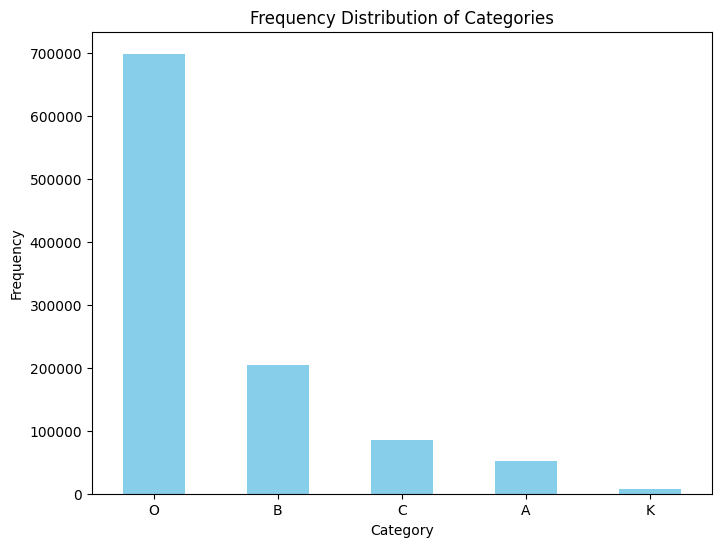

In [ ]:
value_counts = data['CRASH_SEVERITY'].value_counts()

plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

## Step 3: Data Cleaning

### Missing Values

In [ ]:
# fill in the columns where crash is not work zone related
data['WORK_ZONE_LOCATION'].fillna('Not Applicable', inplace=True)
data['WORK_ZONE_TYPE'].fillna('Not Applicable', inplace=True)

# Drop unnecessary columns with missing data
# Changes: added 'K_PEOPLE', 'A_PEOPLE', 'B_PEOPLE', 'C_PEOPLE', 'PERSONS_INJURED'
columns_to_drop = ['SPEED_DIFF_MAX', 'FUN', 'FAC', 'MPO_NAME', 'NODE', 'OFFSET', 'RNS_MP', 'OBJECTID', 'DOCUMENT_NBR', 'PHYSICAL_JURIS', 'RTE_NM', 'VSP', 'JURIS_CODE',
                   'K_PEOPLE', 'A_PEOPLE', 'B_PEOPLE', 'C_PEOPLE', 'PERSONS_INJURED']

data.drop(columns=columns_to_drop, inplace=True)

data.dropna(subset=['X', 'Y'], inplace=True)
data = data.reset_index(drop=True)

### Encode Date String

In [ ]:
# encode date
from datetime import datetime

# 2015/10/16 03:59:59+00	-> number
def date_string_convert(date_string):
  length = len(date_string)
  date_string = date_string[0:length-3]
  date_obj = datetime.strptime(date_string, "%Y/%m/%d %H:%M:%S")
  timestamp = date_obj.timestamp()
  return timestamp

data["CRASH_DT"] = data["CRASH_DT"].apply(date_string_convert)

# Train Test Split
Stratified sampling based on CRASH_SEVERITY

In [ ]:
X = data.drop(columns=['CRASH_SEVERITY'])
y = data['CRASH_SEVERITY'].copy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

## Pipeline for Data Cleaning

In [ ]:
# num_features = ["X", "Y", "CRASH_YEAR", "CRASH_DT", "CRASH_MILITARY_TM", "K_PEOPLE", "A_PEOPLE", "B_PEOPLE", "C_PEOPLE", "PERSONS_INJURED", "PEDESTRIANS_KILLED", "VEH_COUNT", "PEDESTRIANS_INJURED"]

num_features = ["X", "Y", "CRASH_YEAR", "CRASH_DT", "CRASH_MILITARY_TM", "PEDESTRIANS_KILLED", "VEH_COUNT", "PEDESTRIANS_INJURED"]
# Changes: removed "K_PEOPLE", "A_PEOPLE", "B_PEOPLE", "C_PEOPLE", PERSONS_INJURED

one_hot_features = ["COLLISION_TYPE",	"WEATHER_CONDITION",	"LIGHT_CONDITION",	"ROADWAY_SURFACE_COND",	"RELATION_TO_ROADWAY",	"ROADWAY_ALIGNMENT",	"ROADWAY_SURFACE_TYPE",
                    "ROADWAY_DEFECT",	"ROADWAY_DESCRIPTION",	"INTERSECTION_TYPE",	"TRAFFIC_CONTROL_TYPE",	"TRFC_CTRL_STATUS_TYPE",	"WORK_ZONE_RELATED",	"WORK_ZONE_LOCATION",
                    "WORK_ZONE_TYPE",	"SCHOOL_ZONE",	"FIRST_HARMFUL_EVENT",	"FIRST_HARMFUL_EVENT_LOC",	"ALCOHOL_NOTALCOHOL",	"ANIMAL",	"BELTED_UNBELTED",	"BIKE_NONBIKE",
                    "DISTRACTED_NOTDISTRACTED",	"DROWSY_NOTDROWSY",	"DRUG_NODRUG",	"GR_NOGR",	"HITRUN_NOT_HITRUN",	"LGTRUCK_NONLGTRUCK",	"MOTOR_NONMOTOR",	"PED_NONPED",	"SPEED_NOTSPEED",
                    "RD_TYPE",	"INTERSECTION_ANALYSIS",	"SENIOR_NOTSENIOR",	"YOUNG_NOTYOUNG",	"MAINLINE_YN",	"NIGHT",	"VDOT_DISTRICT",	"AREA_TYPE",	"SYSTEM",	"OWNERSHIP",	"PLAN_DISTRICT"]

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler


categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_pipeline, one_hot_features),
        ('num', numerical_pipeline, num_features)
    ])

X_cleaned = preprocessor.fit_transform(X_train)

In [ ]:
X_cleaned.shape

(838637, 284)

# Train and Test Models

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_cleaned, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_cleaned, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy, precision, recall, and F1 score
def print_model_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)


In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


test_cleaned = preprocessor.fit_transform(X_test)
y_pred = classifier.predict(test_cleaned)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9991670932304673
Recall: 0.9991653152723458
F1 Score: 0.9991500757676389


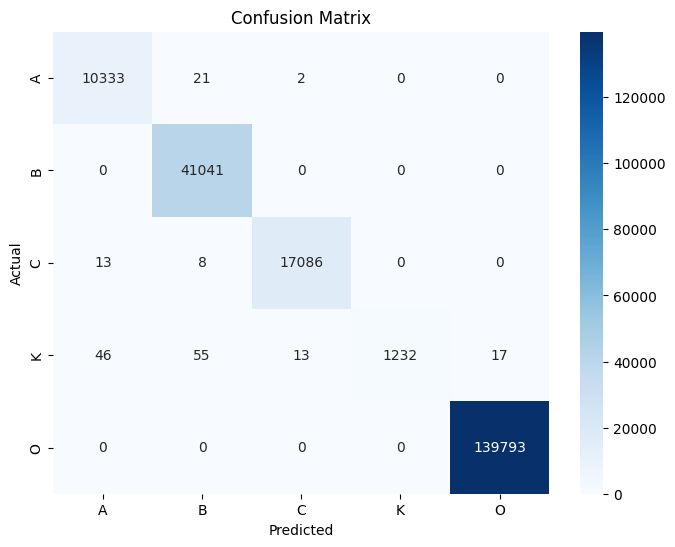

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Now, lets take a look at the relative importance of features learned by the model:

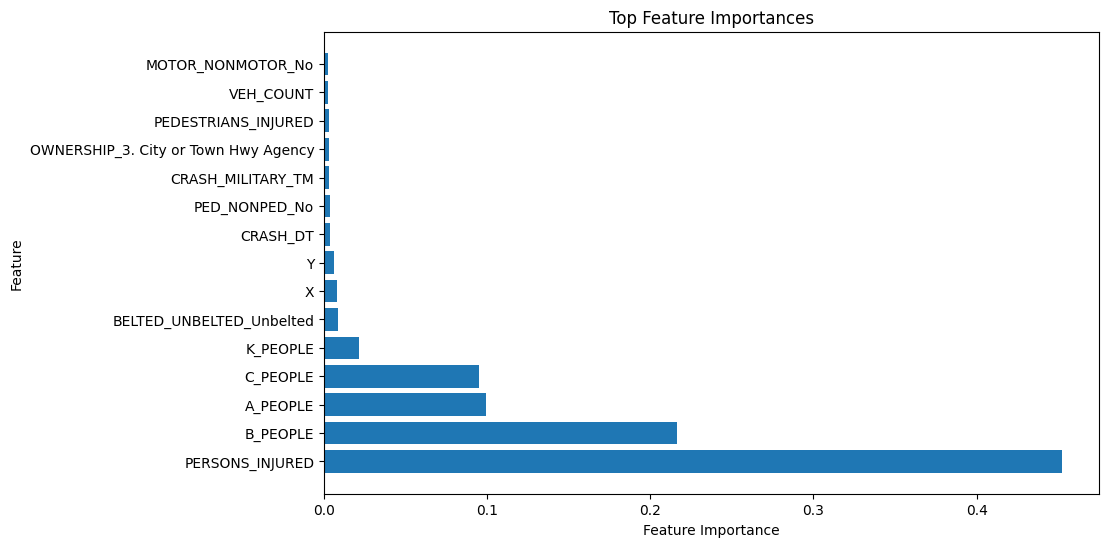

In [ ]:
import matplotlib.pyplot as plt

feature_importances = classifier.feature_importances_
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=one_hot_features)
all_feature_names = list(categorical_feature_names) + num_features
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.show()


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression(solver='liblinear', random_state=42)
log_reg_clf.fit(X_cleaned, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.5, 1, 2, 5],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

clf = LogisticRegression(solver='liblinear', random_state=42)

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_cleaned, y_train)

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


test_cleaned = preprocessor.fit_transform(X_test)
y_pred = log_reg_clf.predict(test_cleaned)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9999856921178508
Recall: 0.9999856911189545
F1 Score: 0.9999856911954393


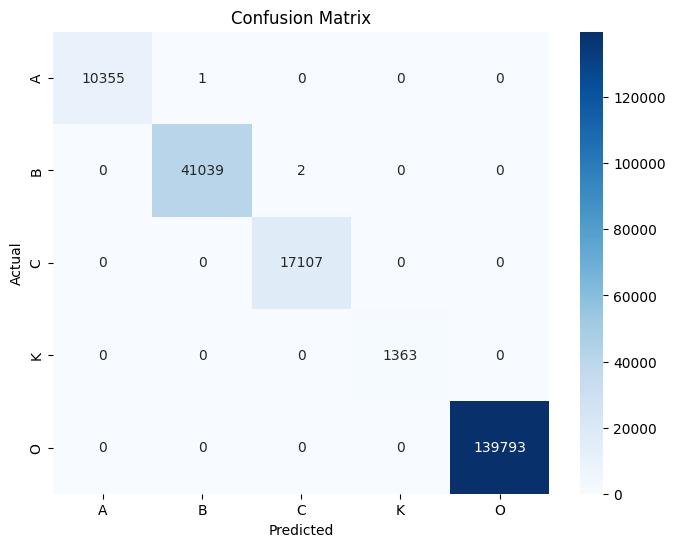

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=log_reg_clf.classes_, yticklabels=log_reg_clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Questions
- Can we predict if a crash will be fatal given various features?
- What features contribute most to the fatality of a crash?

# Time Series Forecasting for Number of Crashes

In [ ]:
data = pd.read_csv('gdrive/My Drive/Crash_Data.csv')

value_counts = data['PHYSICAL_JURIS'].value_counts()
print(value_counts)

data['CRASH_DT'] = pd.to_datetime(data['CRASH_DT'], utc=True)
data['date'] = data['CRASH_DT'].dt.date
df_sorted = data.sort_values(by='date')

029. Fairfax County            98318
134. City of Virginia Beach    52180
043. Henrico County            48584
127. City of Richmond          47895
020. Chesterfield County       46019
                               ...  
287. Town of Quantico              4
296. Town of Saxis                 4
193. Town of Cleveland             3
293. Town of St. Charles           3
309. Town of Tangier               1
Name: PHYSICAL_JURIS, Length: 324, dtype: int64


In [ ]:
df_sorted

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,...,SYSTEM,VSP,OWNERSHIP,PLAN_DISTRICT,MPO_NAME,RTE_NM,RNS_MP,NODE,OFFSET,date
16770,-79.096347,38.160256,16771,150695225,2015,2015-01-01 05:00:00+00:00,330,C,0,0,...,NonVDOT secondary,3,3. City or Town Hwy Agency,Central Shenandoah,SAW,S-VA132PR GRUBERT AVE,0.35,136558.0,1853.0,2015-01-01
67593,-77.208626,38.933244,67594,150335083,2015,2015-01-01 05:00:00+00:00,2122,O,0,0,...,VDOT Primary,7,1. State Hwy Agency,Northern Virginia,NOVA,R-VA SR00267WB RMP018.00A,0.07,719611.0,433.0,2015-01-01
110315,-76.728825,37.997448,110316,150025119,2015,2015-01-01 05:00:00+00:00,545,O,0,0,...,VDOT Primary,1,1. State Hwy Agency,Northern Neck,NaN,R-VA SR00003EB,87.31,566297.0,11.0,2015-01-01
35514,-82.608684,36.939000,35515,150325022,2015,2015-01-01 05:00:00+00:00,1847,O,0,0,...,VDOT Primary,4,1. State Hwy Agency,Lenowisco,NaN,R-VA US00058WBALT001,38.36,662021.0,681.0,2015-01-01
53947,-76.331580,36.788664,53948,150025175,2015,2015-01-01 05:00:00+00:00,2259,A,0,1,...,NonVDOT secondary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,S-VA131PR FERNDALE RD,0.02,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994456,-76.363232,37.030105,994457,231935102,2023,2023-06-30 03:59:59+00:00,1211,C,0,0,...,NonVDOT secondary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,S-VA114NP MICHIGAN DR,0.48,NaN,NaN,2023-06-30
1016186,-75.762711,37.619373,1016187,231845231,2023,2023-06-30 03:59:59+00:00,614,C,0,0,...,VDOT Primary,5,1. State Hwy Agency,Accomack-Northampton,NaN,R-VA US00013SB,111.71,105797.0,143.0,2023-06-30
1002272,-76.127929,36.904062,1002273,231995033,2023,2023-06-30 03:59:59+00:00,1527,O,0,0,...,NonVDOT primary,5,3. City or Town Hwy Agency,Hampton Roads,HAMP,R-VA US00060WB,290.63,541131.0,37.0,2023-06-30
1037655,-79.948101,37.772266,1037656,231835142,2023,2023-06-30 03:59:59+00:00,1722,O,0,0,...,VDOT Interstate,6,1. State Hwy Agency,Roanoke Valley-Alleghany,NaN,R-VA IS00064WB,17.77,NaN,NaN,2023-06-30


What are we doing:
- Regression for whole state
- Regression for large counties

### Let's start by looking at some example time series in the data

In [ ]:
import matplotlib.pyplot as plt

def plot_all():
    plt.figure(figsize=(12, 6))
    daily_counts = df_sorted.groupby('date').size()

    daily_counts.plot(kind='line', linestyle='-')
    plt.title('Number of Accidents per Day in Virginia')
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.show()

def plot_county_year(county, year):
    plt.figure(figsize=(12, 6))

    filtered_df = df_sorted[df_sorted['CRASH_DT'].dt.year == year]
    filter_by_county = filtered_df[filtered_df['PHYSICAL_JURIS'] == county]
    daily_counts = filter_by_county.groupby('date').size()

    daily_counts.plot(kind='line', linestyle='-', color='tab:green')
    plt.title('Number of Accidents per Day in {} {}'.format(county, year))
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.show()

def plot_year(year):
    plt.figure(figsize=(12, 6))

    filtered_df = df_sorted[df_sorted['CRASH_DT'].dt.year == year]
    daily_counts = filtered_df.groupby('date').size()

    daily_counts.plot(kind='line', linestyle='-', color='tab:orange')
    plt.title('Number of Accidents per Day in {} in Virginia'.format(year))
    plt.xlabel('Date')
    plt.ylabel('Number of Accidents')
    plt.show()

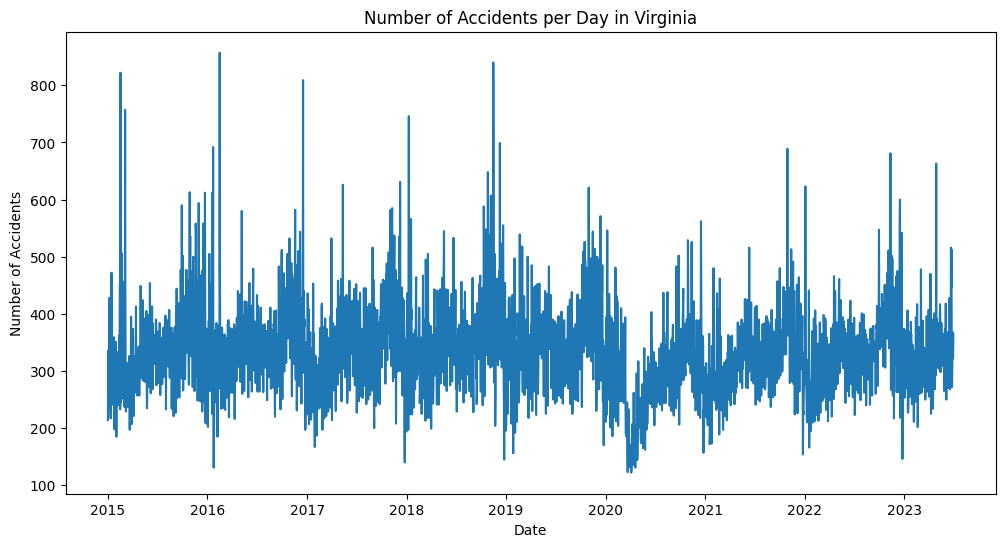

In [ ]:
plot_all()

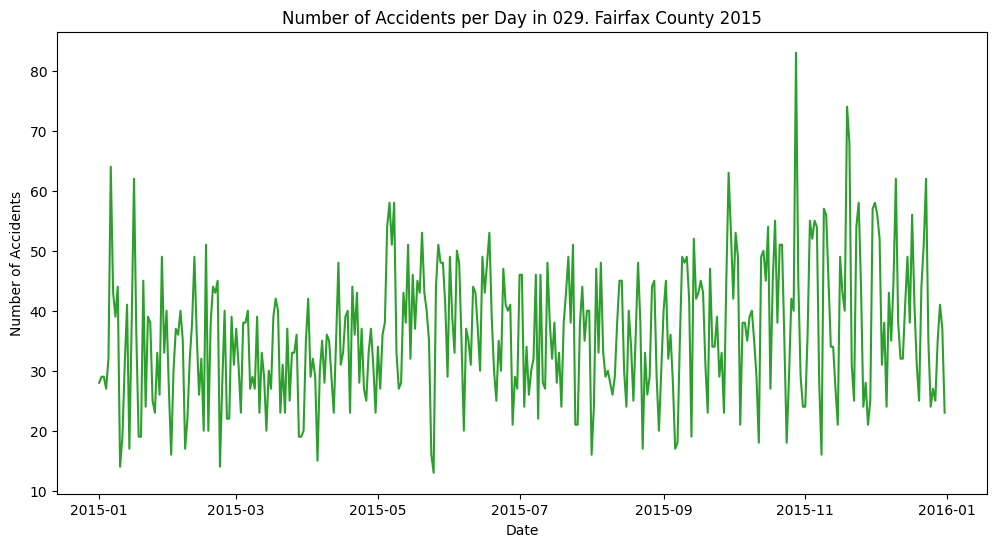

In [ ]:
plot_county_year("029. Fairfax County", 2015)

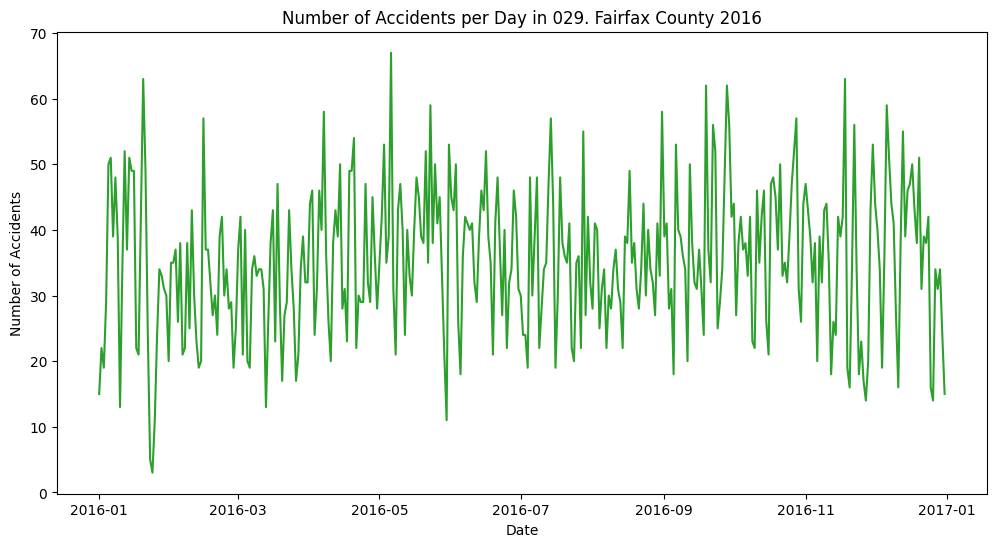

In [ ]:
plot_county_year("029. Fairfax County", 2016)

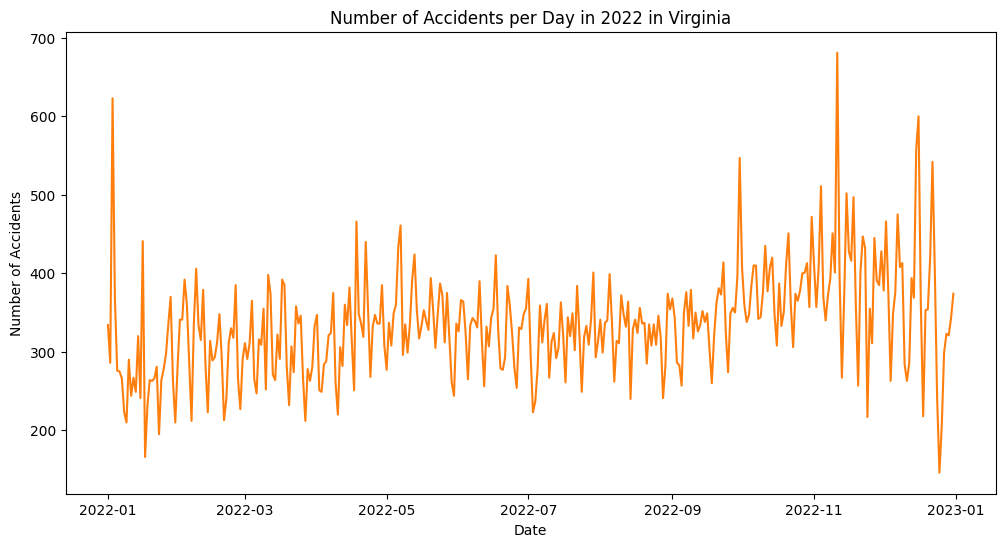

In [ ]:
plot_year(2022)

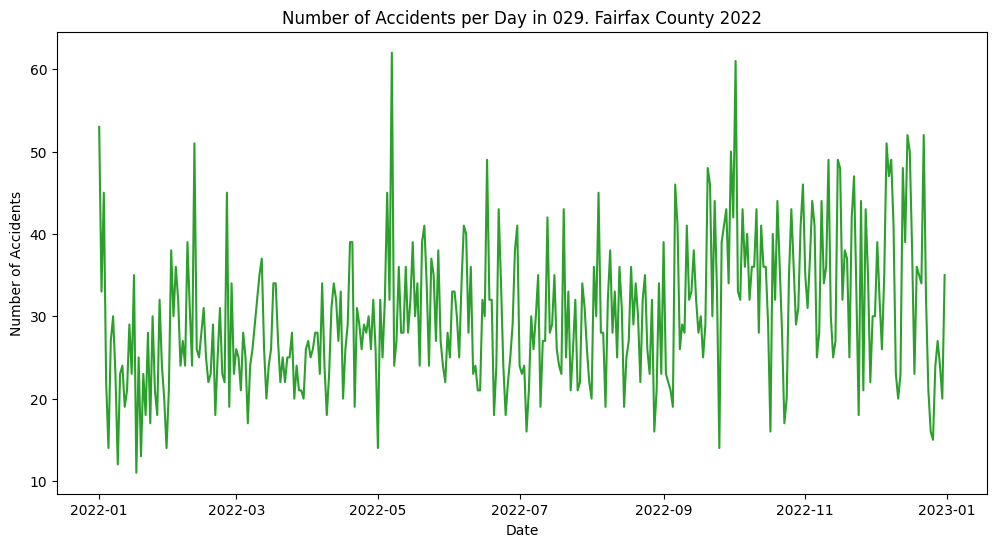

In [ ]:
plot_county_year("029. Fairfax County", 2022)

In [ ]:
# Prepared data by county or whole state - input to model

def get_county_df(county):
    filter_by_county = df_sorted[df_sorted['PHYSICAL_JURIS'] == county]
    daily_counts = filter_by_county.groupby('date').size()
    daily_counts_df = pd.DataFrame({'date': daily_counts.index, 'count': daily_counts.values})
    return daily_counts_df

def get_state_df():
    daily_counts = df_sorted.groupby('date').size()
    daily_counts_df = pd.DataFrame({'date': daily_counts.index, 'count': daily_counts.values})
    return daily_counts_df

In [ ]:
get_state_df()

,date,count
0,2015-01-01,214
1,2015-01-02,266
2,2015-01-03,337
3,2015-01-04,256
4,2015-01-05,309
...,...,...
3098,2023-06-26,303
3099,2023-06-27,368
3100,2023-06-28,324
3101,2023-06-29,322


In [ ]:
get_county_df("029. Fairfax County")

,date,count
0,2015-01-01,28
1,2015-01-02,29
2,2015-01-03,29
3,2015-01-04,27
4,2015-01-05,32
...,...,...
3098,2023-06-26,26
3099,2023-06-27,41
3100,2023-06-28,27
3101,2023-06-29,26


# Using LSTM for time series forecasting

train 2482
test 621
Epoch 1/50
78/78 [==============================] - 4s 12ms/step - loss: 0.0186 - val_loss: 0.0073
Epoch 2/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0094 - val_loss: 0.0076
Epoch 3/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0094 - val_loss: 0.0072
Epoch 4/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0093 - val_loss: 0.0074
Epoch 5/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0095 - val_loss: 0.0072
Epoch 6/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0094 - val_loss: 0.0072
Epoch 7/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0091 - val_loss: 0.0072
Epoch 8/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0091 - val_loss: 0.0071
Epoch 9/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0089 - val_loss: 0.0069
Epoch 10/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0088 - val_loss: 0.006

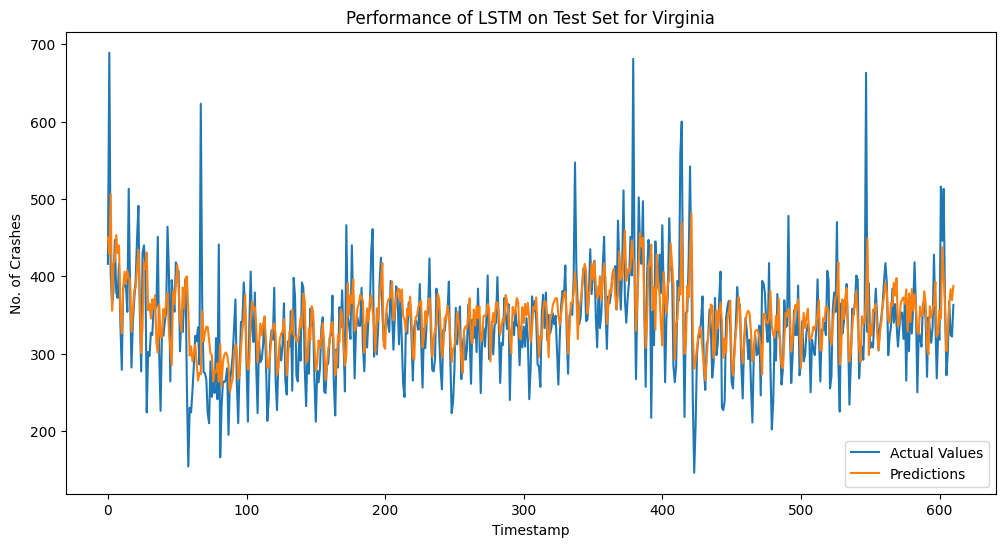

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df=get_state_df()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
data = df['count'].values.reshape(-1, 1)

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

print('train {}'.format(len(train_data)))
print('test {}'.format(len(test_data)))

# Function to create sequences for training the LSTM
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        target = data[i+seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)


# Parameters of LSTM model
sequence_length = 10
LSTM_units = 50
batch_size = 32
epochs = 50

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=LSTM_units, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

mse = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {mse}')

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual Values')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title("Performance of LSTM on Test Set for Virginia")
plt.xlabel('Timestamp')
plt.ylabel('No. of Crashes')
plt.show()


12/12 [==============================] - 0s 2ms/step


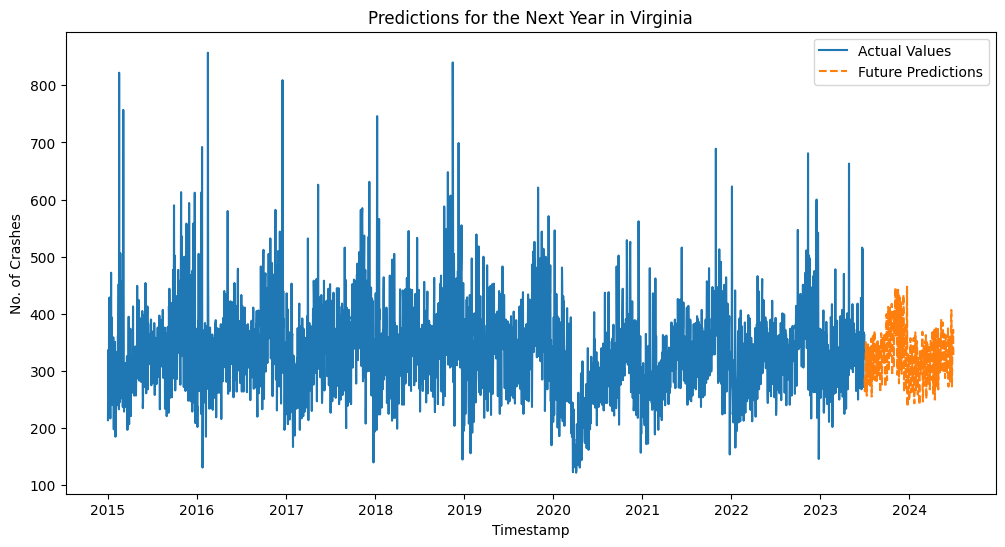

In [ ]:
def create_future_sequences(data, seq_length, num_future_steps):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i+seq_length]
        sequences.append(seq)
    return np.array(sequences[-num_future_steps:])


X_future = create_future_sequences(data_scaled, sequence_length,365) # change this to set how far into the future we want to predict
X_future = X_future.reshape(X_future.shape[0], X_future.shape[1], 1)
future_predictions = model.predict(X_future)
future_predictions = scaler.inverse_transform(future_predictions)

future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=len(future_predictions), freq='D')
future_df = pd.DataFrame({'date': future_dates, 'predicted_count': future_predictions.flatten()})

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['count'], label='Actual Values')
plt.plot(future_df['date'], future_df['predicted_count'], label='Future Predictions', linestyle='dashed')
plt.legend()
plt.title("Predictions for the Next Year in Virginia")
plt.xlabel('Timestamp')
plt.ylabel('No. of Crashes')
plt.show()


## Similar predictions can be made at the county level:



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

def county_level_ts_forecast(county="029. Fairfax County"):

    df=get_county_df(county)
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values('date')
    data = df['count'].values.reshape(-1, 1)

    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)

    train_size = int(len(data_scaled) * 0.8)
    train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

    # Function to create sequences for training the LSTM
    def create_sequences(data, seq_length):
        sequences = []
        targets = []
        for i in range(len(data) - seq_length):
            seq = data[i:i+seq_length]
            target = data[i+seq_length]
            sequences.append(seq)
            targets.append(target)
        return np.array(sequences), np.array(targets)


    # Parameters of LSTM model
    sequence_length = 10
    LSTM_units = 50
    batch_size = 32
    epochs = 50

    X_train, y_train = create_sequences(train_data, sequence_length)
    X_test, y_test = create_sequences(test_data, sequence_length)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model = Sequential()
    model.add(LSTM(units=LSTM_units, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')


    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

    mse = model.evaluate(X_test, y_test)
    print(f'Mean Squared Error on Test Data: {mse}')

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions)
    actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

    plt.figure(figsize=(12, 6))
    plt.plot(actual_values, label='Actual Values')
    plt.plot(predictions, label='Predictions')
    plt.legend()
    plt.title("Performance of LSTM on Test Set for {}".format(county))
    plt.xlabel('Timestamp')
    plt.ylabel('No. of Crashes')
    plt.show()

    def create_future_sequences(data, seq_length, num_future_steps):
        sequences = []
        for i in range(len(data) - seq_length + 1):
            seq = data[i:i+seq_length]
            sequences.append(seq)
        return np.array(sequences[-num_future_steps:])


    X_future = create_future_sequences(data_scaled, sequence_length,365) # change this to set how far into the future we want to predict
    X_future = X_future.reshape(X_future.shape[0], X_future.shape[1], 1)
    future_predictions = model.predict(X_future)
    future_predictions = scaler.inverse_transform(future_predictions)

    future_dates = pd.date_range(start=df['date'].max() + pd.Timedelta(days=1), periods=len(future_predictions), freq='D')
    future_df = pd.DataFrame({'date': future_dates, 'predicted_count': future_predictions.flatten()})

    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], df['count'], label='Actual Values')
    plt.plot(future_df['date'], future_df['predicted_count'], label='Future Predictions', linestyle='dashed')
    plt.legend()
    plt.title("Predictions for the next year for {}".format(county))
    plt.xlabel('Timestamp')
    plt.ylabel('No. of Crashes')
    plt.show()

Epoch 1/50
78/78 [==============================] - 6s 29ms/step - loss: 0.0250 - val_loss: 0.0104
Epoch 2/50
78/78 [==============================] - 2s 22ms/step - loss: 0.0154 - val_loss: 0.0104
Epoch 3/50
78/78 [==============================] - 1s 16ms/step - loss: 0.0155 - val_loss: 0.0104
Epoch 4/50
78/78 [==============================] - 1s 16ms/step - loss: 0.0155 - val_loss: 0.0105
Epoch 5/50
78/78 [==============================] - 2s 23ms/step - loss: 0.0154 - val_loss: 0.0103
Epoch 6/50
78/78 [==============================] - 2s 26ms/step - loss: 0.0153 - val_loss: 0.0110
Epoch 7/50
78/78 [==============================] - 2s 30ms/step - loss: 0.0152 - val_loss: 0.0104
Epoch 8/50
78/78 [==============================] - 2s 22ms/step - loss: 0.0151 - val_loss: 0.0102
Epoch 9/50
78/78 [==============================] - 2s 20ms/step - loss: 0.0150 - val_loss: 0.0111
Epoch 10/50
78/78 [==============================] - 1s 10ms/step - loss: 0.0149 - val_loss: 0.0102
Epoch 11/

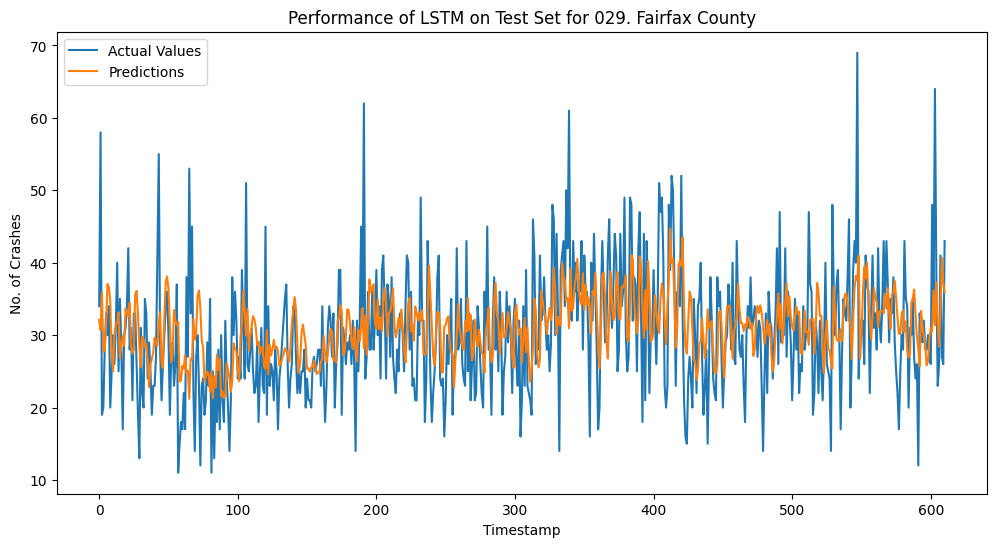

12/12 [==============================] - 0s 4ms/step


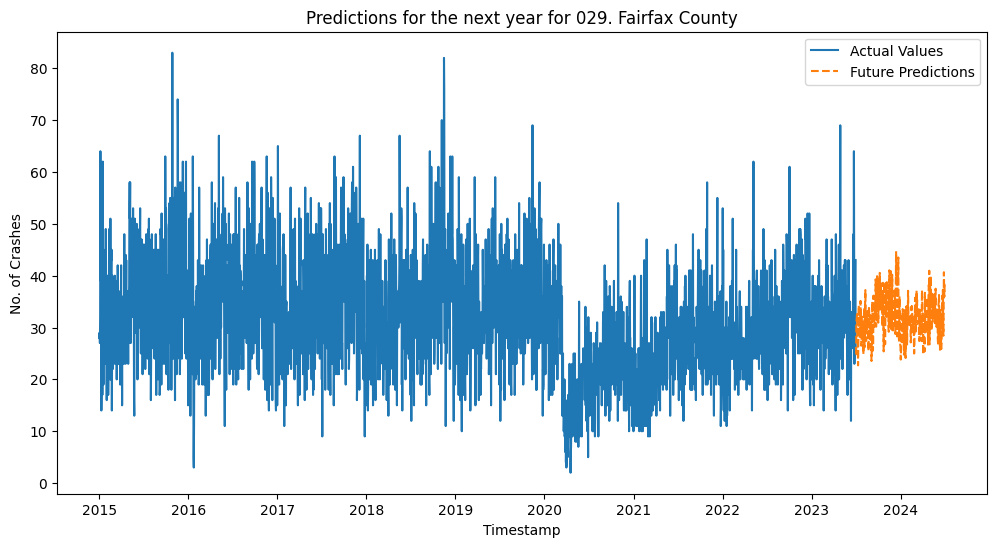

In [ ]:
county_level_ts_forecast(county="029. Fairfax County")

Epoch 1/50
78/78 [==============================] - 5s 28ms/step - loss: 0.0321 - val_loss: 0.0105
Epoch 2/50
78/78 [==============================] - 1s 18ms/step - loss: 0.0149 - val_loss: 0.0105
Epoch 3/50
78/78 [==============================] - 2s 23ms/step - loss: 0.0148 - val_loss: 0.0099
Epoch 4/50
78/78 [==============================] - 2s 29ms/step - loss: 0.0148 - val_loss: 0.0119
Epoch 5/50
78/78 [==============================] - 1s 15ms/step - loss: 0.0149 - val_loss: 0.0118
Epoch 6/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0147 - val_loss: 0.0107
Epoch 7/50
78/78 [==============================] - 1s 10ms/step - loss: 0.0146 - val_loss: 0.0111
Epoch 8/50
78/78 [==============================] - 1s 10ms/step - loss: 0.0146 - val_loss: 0.0103
Epoch 9/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0145 - val_loss: 0.0103
Epoch 10/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0145 - val_loss: 0.0106
Epoch 11/50


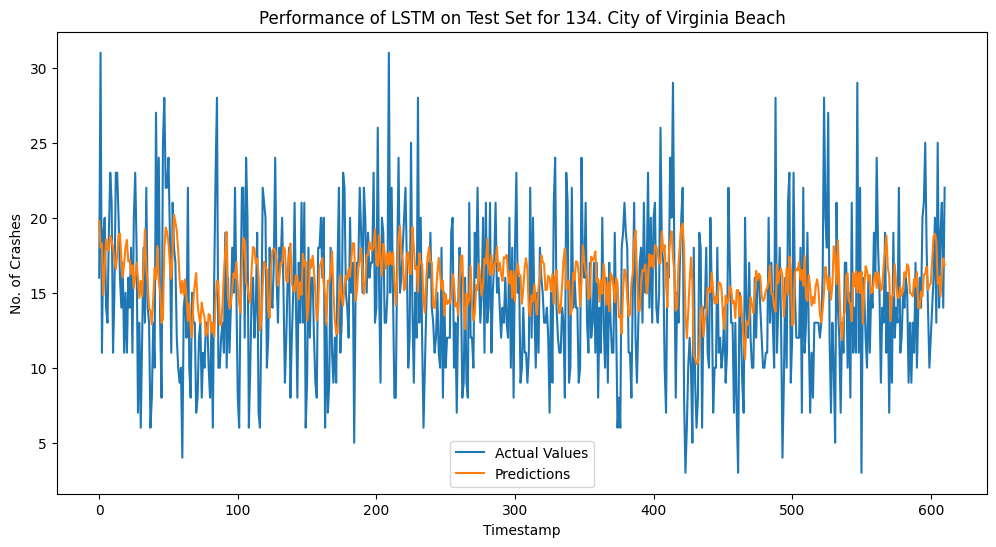

12/12 [==============================] - 0s 3ms/step


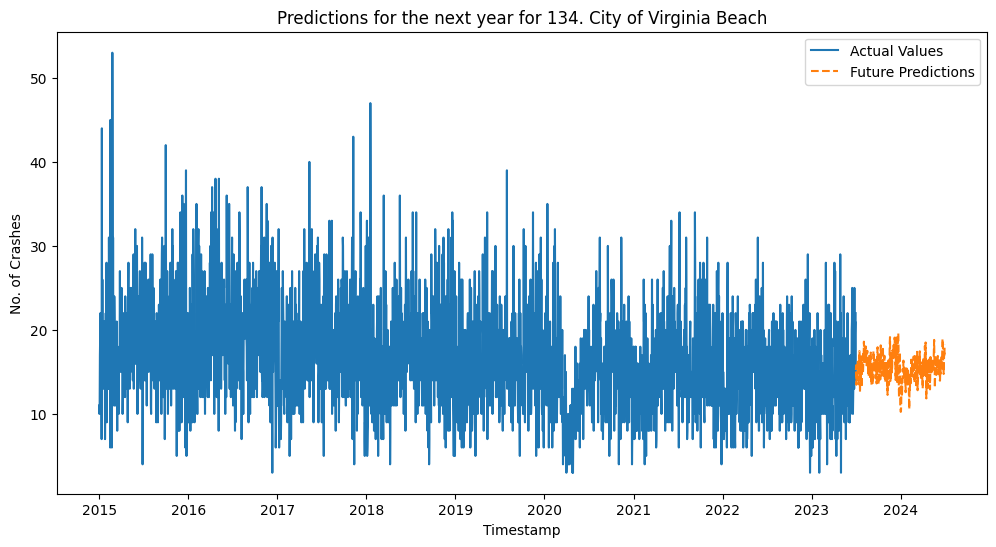

In [ ]:
county_level_ts_forecast(county="134. City of Virginia Beach")

Epoch 1/50
78/78 [==============================] - 11s 27ms/step - loss: 0.0161 - val_loss: 0.0059
Epoch 2/50
78/78 [==============================] - 2s 21ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 3/50
78/78 [==============================] - 2s 19ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 4/50
78/78 [==============================] - 2s 21ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 5/50
78/78 [==============================] - 2s 20ms/step - loss: 0.0077 - val_loss: 0.0058
Epoch 6/50
78/78 [==============================] - 2s 26ms/step - loss: 0.0077 - val_loss: 0.0059
Epoch 7/50
78/78 [==============================] - 2s 24ms/step - loss: 0.0077 - val_loss: 0.0058
Epoch 8/50
78/78 [==============================] - 2s 21ms/step - loss: 0.0077 - val_loss: 0.0060
Epoch 9/50
78/78 [==============================] - 1s 19ms/step - loss: 0.0077 - val_loss: 0.0058
Epoch 10/50
78/78 [==============================] - 2s 20ms/step - loss: 0.0077 - val_loss: 0.0060
Epoch 11

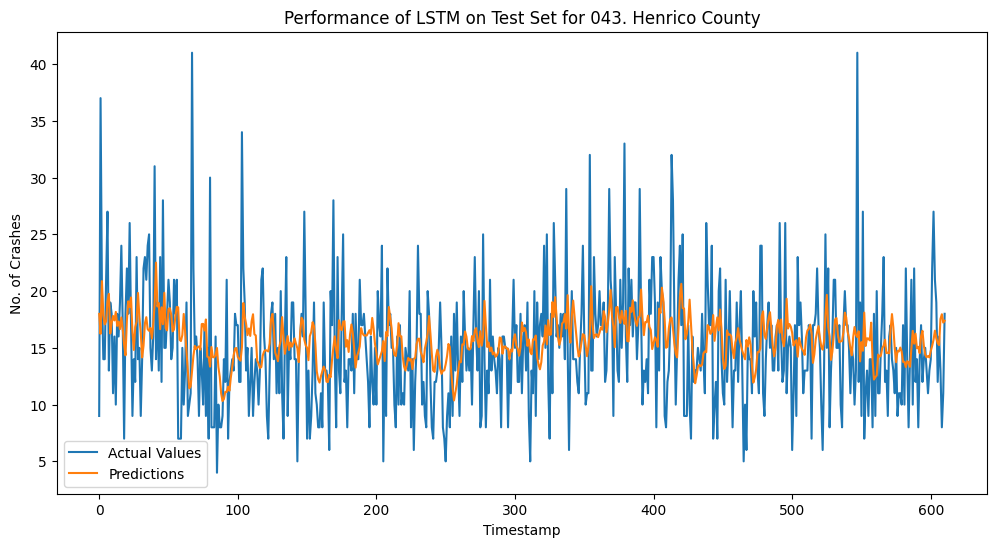

12/12 [==============================] - 0s 4ms/step


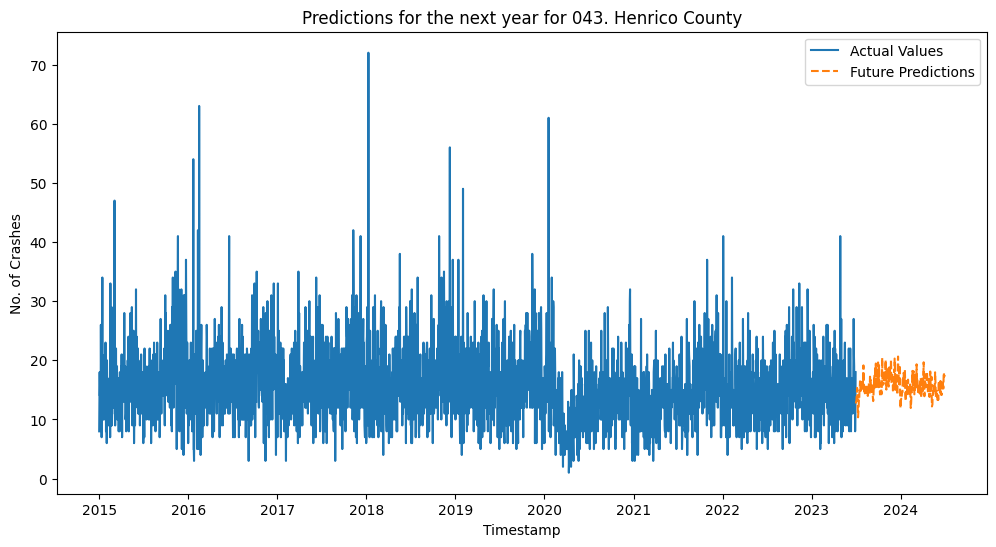

In [ ]:
county_level_ts_forecast(county="043. Henrico County")

Epoch 1/50
78/78 [==============================] - 5s 26ms/step - loss: 0.0236 - val_loss: 0.0083
Epoch 2/50
78/78 [==============================] - 1s 15ms/step - loss: 0.0101 - val_loss: 0.0083
Epoch 3/50
78/78 [==============================] - 1s 19ms/step - loss: 0.0100 - val_loss: 0.0084
Epoch 4/50
78/78 [==============================] - 1s 18ms/step - loss: 0.0101 - val_loss: 0.0083
Epoch 5/50
78/78 [==============================] - 2s 19ms/step - loss: 0.0101 - val_loss: 0.0083
Epoch 6/50
78/78 [==============================] - 2s 19ms/step - loss: 0.0100 - val_loss: 0.0086
Epoch 7/50
78/78 [==============================] - 1s 18ms/step - loss: 0.0100 - val_loss: 0.0084
Epoch 8/50
78/78 [==============================] - 1s 14ms/step - loss: 0.0100 - val_loss: 0.0083
Epoch 9/50
78/78 [==============================] - 1s 8ms/step - loss: 0.0100 - val_loss: 0.0083
Epoch 10/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0099 - val_loss: 0.0084
Epoch 11/50

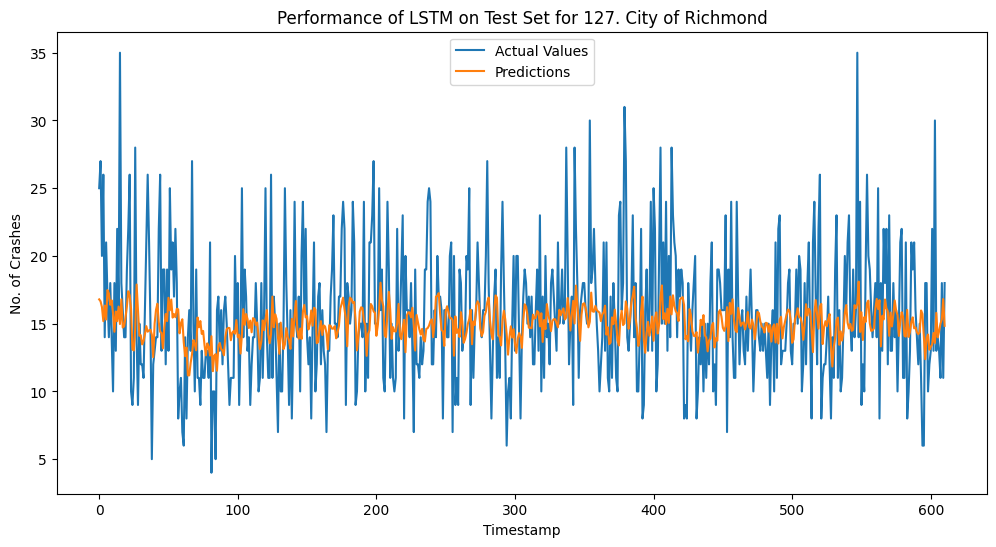

12/12 [==============================] - 0s 4ms/step


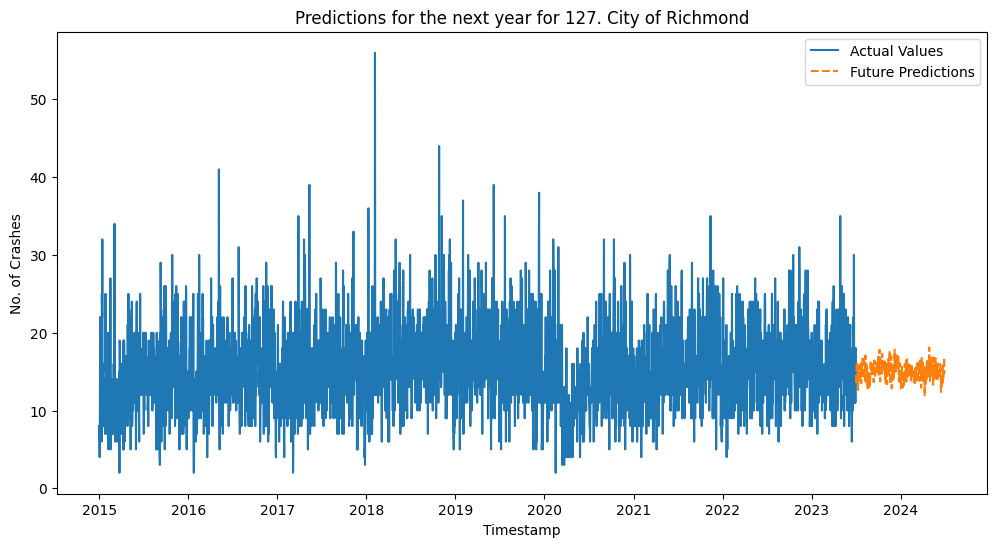

In [ ]:
county_level_ts_forecast(county="127. City of Richmond")

Epoch 1/50
78/78 [==============================] - 3s 16ms/step - loss: 0.0092 - val_loss: 0.0056
Epoch 2/50
78/78 [==============================] - 1s 14ms/step - loss: 0.0064 - val_loss: 0.0056
Epoch 3/50
78/78 [==============================] - 1s 14ms/step - loss: 0.0064 - val_loss: 0.0058
Epoch 4/50
78/78 [==============================] - 1s 14ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 5/50
78/78 [==============================] - 1s 14ms/step - loss: 0.0063 - val_loss: 0.0057
Epoch 6/50
78/78 [==============================] - 1s 13ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 7/50
78/78 [==============================] - 1s 13ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 8/50
78/78 [==============================] - 1s 9ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 9/50
78/78 [==============================] - 1s 8ms/step - loss: 0.0064 - val_loss: 0.0057
Epoch 10/50
78/78 [==============================] - 1s 8ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 11/50


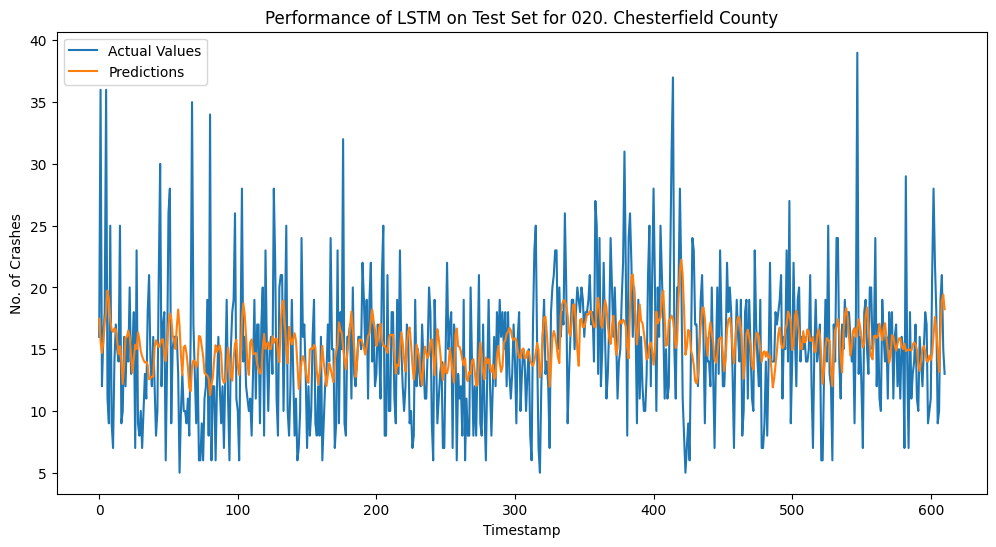

12/12 [==============================] - 0s 3ms/step


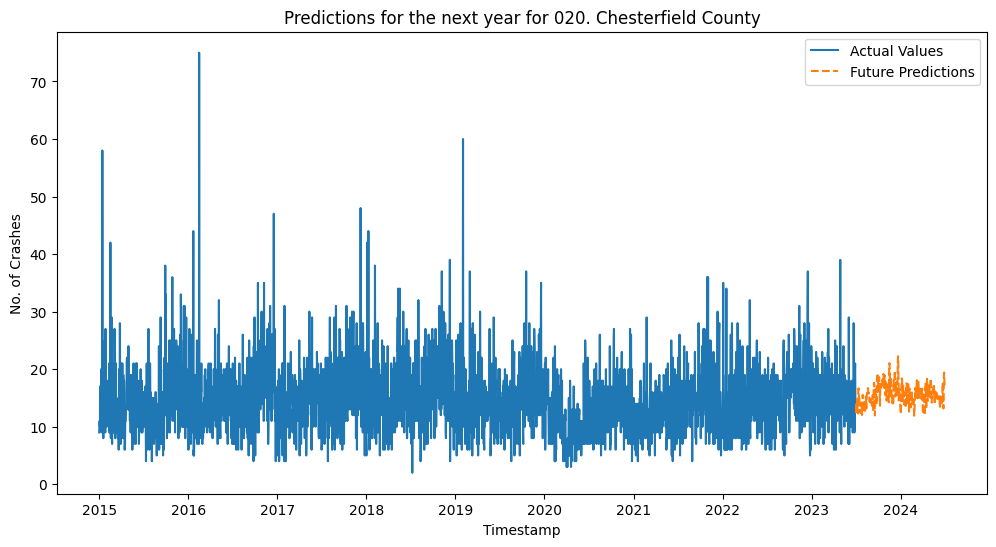

In [ ]:
county_level_ts_forecast(county="020. Chesterfield County")

References

LSTM Tutorial https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/